<a href="https://colab.research.google.com/github/RebecaFigueroa/RebecaFigueroa/blob/main/Afterclass_final_Clase_15_Modelos_Anal%C3%ADticos_para_DS_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Afterclass**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
ruta = '/content/gdrive/MyDrive/Empresas/Cursos/Data Science/Clase 15 - Modelos Analíticos para DS III/Mall_Customers.csv'
dataset = pd.read_csv(ruta)

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Aquí tenemos las siguientes características:
1. **CustomerID:** Es la identificación única otorgada a un cliente
2. **Género:** Género del cliente
3. **Edad:** La edad del cliente
4. **Ingreso Anual (k$):** Es el ingreso anual del cliente
5. **Puntaje de gastos:** Es el puntaje (sobre 100) que las autoridades del centro comercial otorgan a un cliente, en función del dinero gastado y el comportamiento del cliente.

In [ ]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

## **Clustering**

### **Clustering jerárquico**

#### **Clustering aglomerativo (bottom-up)**

Paso a paso:

1.   **Carga del conjunto de datos:** Delimitar cantidad de columnas que vamos a utilizar.
2.   **Escalado de atributos:** También conocido como estandarización o normalización. Al escalar los datos, el objetivo principal es transformar las variables para que tengan media cero y desviación estándar uno.
3.   **Creación del modelo de clustering aglomerativo:** Se puede especificar el número de clústeres o dejar que el algoritmo forme una estructura jerárquica utilizando la distancia entre los puntos.
5.   **Definir método de enlace.**
6.   **Visualización de los dendrograma.**
7.   **Obtención de etiquetas:** Obtenemos las etiquetas de los clústeres para cada punto en el conjunto de dato.
8.   **Ajuste del modelo.**
9.   **Visualización gráficos.**


*   **El método fit_transform utiliza la distancia euclidiana:** Estandarizar los atributos numéricos y tener media cero y desviación estándar uno.
*   **Método Ward:** El método de enlace 'ward' es un método de enlace aglomerativo que busca minimizar la varianza total dentro de los clústeres. En cada paso de la construcción del dendrograma, este método calcula la varianza de los datos en los clústeres que se unirán y luego combina los clústeres que minimizan el aumento total de la varianza después de la unión. Es un método comúnmente utilizado en clustering jerárquico aglomerativo.




In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset["Spending Score (1-100)"].min()

1

Ahora vamos a asignarle a una variable nuestros puntos de datos deseados, los cuales son los ingresos anuales e índice de gastos por cliente. Esto se guarda en un arreglo solamente con los valores.

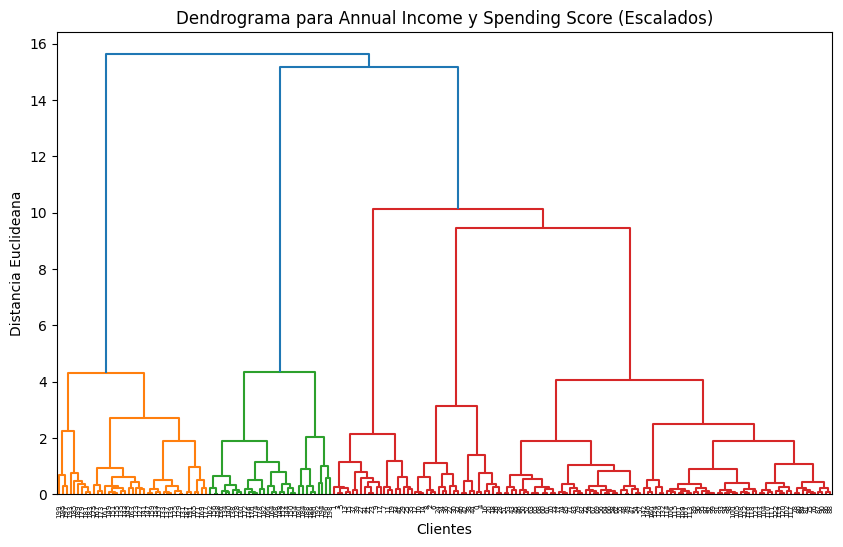

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Paso 1: Seleccionar solo las columnas 'Annual Income (k$)' y 'Spending Score (1-100)'

X = dataset.iloc[:, [3, 4]].values

# Paso 2: Escalar los datos:  Esto asegura que las características tengan media cero y desviación estándar de uno,
#lo que es importante para algunos algoritmos de clustering.
scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(X)

#Paso 3, 4 y 5: Calcular la matriz de enlace para el clustering jerárquico y visualización de dendrograma
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(subset_df_scaled , method='ward'))

# Contextualización gráfico
plt.title('Dendrograma para Annual Income y Spending Score (Escalados)')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclideana')
plt.show()

*   **Visualización dendrograma**: Visualizar cómo los puntos de datos se agrupan y dividen a medida que se realiza el clustering jerárquico.
*   **Altura dendrograma:** Representa la distancia entre los puntos y los clústeres.
*   **Punto parte inferior dendrograma:** Los puntos en la parte inferior representan las muestras individuales, y las uniones representan los clústeres formados.
*   Las alturas de las uniones pueden ayudarte a determinar el número óptimo de clústeres para tu análisis.

A partir de nuestro Dendrograma ¿Cuál es el **número recomendado de agrupaciones** que queremos calcular para nuetsro problema?

Vemos que la intersección de las líneas con la mayor distancia, es decir, la mayor distancia de un nodo, marca 3 grupos diferentes, lo cual indica que nos recomienda cinco agrupaciones para el problema.

##### **Caso I : Cantidad de clusters**

3 culsteres

In [ ]:
num_columns = subset_df_scaled.shape[1]
print("Número de columnas:", num_columns)

Número de columnas: 2


###### **Imprimir etiquetas**

Utilizamos funciones linkage y fcluster

*   **Función linkage:**se utiliza para especificar el método de enlace que se utilizará para calcular la matriz de enlace en el clustering jerárquico aglomerativo.

*   **Función fcluster:** se utiliza para realizar el corte en el dendrograma y obtener las etiquetas de clústeres para cada punto de datos. Aquí está la sintaxis de la función:


`labels = fcluster(sch.linkage(subset_df_scaled, method='ward'), num_clusters, criterion='maxclust')`

**Sintaxis:**

*   **sch.linkage(subset_df_scaled, method='ward'):** Aquí, se calcula la matriz de enlace para el clustering jerárquico aglomerativo utilizando el método de enlace "Ward". El método "Ward" minimiza la varianza de los clústeres que se fusionan en cada paso del algoritmo.

*   **num_clusters:** Es la variable que almacena el número de clústeres deseados. Este valor determinará la cantidad de clústeres en los que se agruparán los datos.

*   **criterion='maxclust':** Se especifica que el corte en el dendrograma se realizará utilizando el criterio 'maxclust', lo que significa que se formarán num_clusters clústeres.

*   **labels = fcluster(...) :** La función fcluster se llama con los argumentos previamente mencionados. Esta función realiza el corte en el dendrograma utilizando el criterio 'maxclust' y devuelve una matriz de etiquetas de clústeres. Cada punto de datos en el conjunto de datos subset_df_scaled estará etiquetado con un número que indica el clúster al que pertenece.




In [ ]:
from scipy.cluster.hierarchy import fcluster

# Supongamos que queremos obtener 3 clusteres
num_clusters = 3

# Paso 6 y 7: Realizar el corte del dendrograma para obtener las etiquetas y ajuste del modelo
labels = fcluster(sch.linkage(subset_df_scaled, method='ward'), num_clusters, criterion='maxclust')

# Ahora, labels contiene las etiquetas de clúster para cada punto de datos
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


**Etiquetas únicas**

In [ ]:
import numpy as np

# Supongamos que tienes el arreglo de etiquetas llamado "labels"
unique_labels = np.unique(labels)

# Ahora unique_labels contiene las etiquetas únicas de los clústeres
print(unique_labels)

[1 2 3]


**Visualización en un gráfico de dispersión**

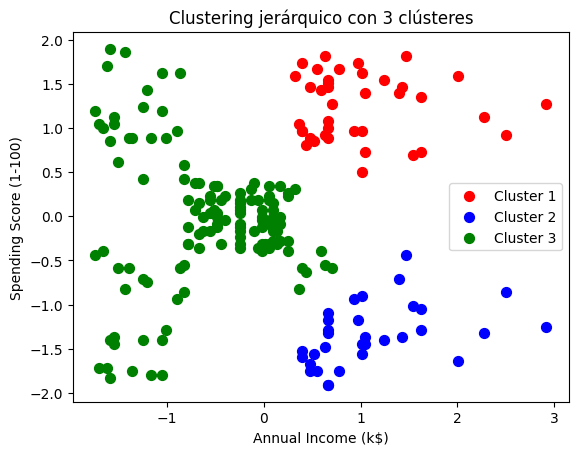

In [ ]:
#Paso 1:Se crea un objeto de la clase AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

#Paso 2: Se ajusta el modelo a los datos normalizados
model.fit(subset_df_scaled)

#Paso 3: Se especifican las etiquetas de los clusteres
labels= fcluster(sch.linkage(subset_df_scaled, method='ward'), num_clusters, criterion='maxclust')

#Paso 4: Gráfico de dispersión especificando las etiquetas de las columnas.
plt.scatter(subset_df_scaled[labels == 1, 0], subset_df_scaled[labels == 1, 1], s=50, c='red', label='Cluster 1')
plt.scatter(subset_df_scaled[labels == 2, 0], subset_df_scaled[labels == 2, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(subset_df_scaled[labels == 3, 0], subset_df_scaled[labels == 3, 1], s=50, c='green', label='Cluster 3')

#Contextualización gráfico
plt.title('Clustering jerárquico con 3 clústeres')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##### **Caso II : Cantidad de clusters**

5 clusteres

**Imprimir etiquetas**

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Supongamos que quieres obtener 5 clústeres
num_clusters = 5

# Paso 6 y 7: Realizar el corte del dendrograma para obtener las etiquetas y ajuste del modelo
labels_2 = fcluster(sch.linkage(subset_df_scaled, method='ward'), num_clusters, criterion='maxclust')

# Ahora, labels contiene las etiquetas de clúster para cada punto de datos
print(labels_2)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 5 1
 2 1 2 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


**Etiquetas unicas**

In [ ]:
import numpy as np

# Supongamos que tienes el arreglo de etiquetas llamado "labels"
unique_labels_2 = np.unique(labels_2)

# Ahora unique_labels contiene las etiquetas únicas de los clústeres
print(unique_labels_2)

[1 2 3 4 5]


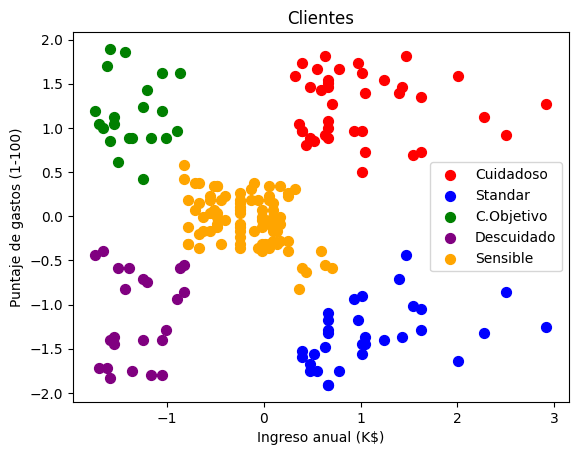

In [ ]:
#Paso 1:Se crea un objeto de la clase AgglomerativeClustering
model_2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

#Paso 2: Se ajusta el modelo a los datos normalizados
model_2.fit(subset_df_scaled)

#Paso 3: Se especifican las etiquetas de los clusteres
labels_2 = fcluster(sch.linkage(subset_df_scaled, method='ward'), num_clusters, criterion='maxclust')

#Paso 4: Gráfico de dispersión especificando las etiquetas de las columnas.
plt.scatter(subset_df_scaled[labels_2 ==1, 0], subset_df_scaled[labels_2 ==1, 1], s=50, marker='o', color='red', label = "Cuidadoso")
plt.scatter(subset_df_scaled[labels_2 ==2, 0], subset_df_scaled[labels_2 ==2, 1], s=50, marker='o', color='blue', label = "Standar")
plt.scatter(subset_df_scaled[labels_2 ==3, 0], subset_df_scaled[labels_2 ==3, 1], s=50, marker='o', color='green', label = "C.Objetivo")
plt.scatter(subset_df_scaled[labels_2 ==4, 0], subset_df_scaled[labels_2 ==4, 1], s=50, marker='o', color='purple', label = "Descuidado")
plt.scatter(subset_df_scaled[labels_2 ==5, 0], subset_df_scaled[labels_2 ==5, 1], s=50, marker='o', color='orange', label = "Sensible")

#Contextualización gráfico
plt.title('Clientes')
plt.xlabel('Ingreso anual (K$)')
plt.ylabel('Puntaje de gastos (1-100)')
plt.legend()
plt.show()

### **Cluster no jerárquico**

#### **K - means**

#### **Método de codo**

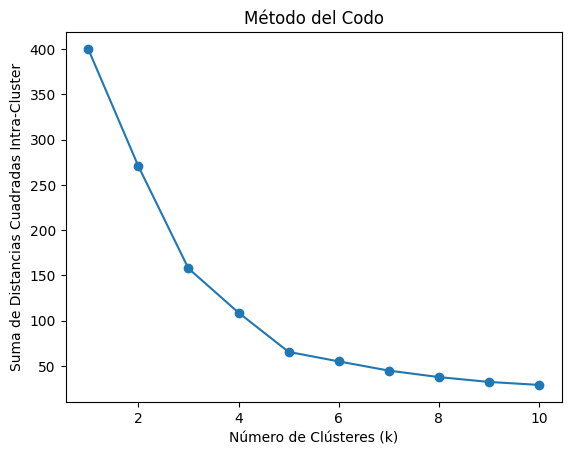

In [ ]:
from sklearn.cluster import KMeans

# Paso 1: Seleccionar solo las columnas 'Annual Income (k$)' y 'Spending Score (1-100)'

X = dataset.iloc[:, [3, 4]].values

# Paso 2: Escalar los datos:  Esto asegura que las características tengan media cero y desviación estándar de uno,
#lo que es importante para algunos algoritmos de clustering.
scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(X)

#Paso 3 Lista para intr-clusters valor k

inertia_values = []

#Paso 4 :Probar diferentes valores de k
for k in range(1, 11):
    #Se crea un objeto kmeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    #Ajuste del modelo con datos escalados.
    kmeans.fit(subset_df_scaled)
    #La inercia es una métrica utilizada para evaluar la calidad del clustering en K-Means.
    inertia_values.append(kmeans.inertia_)

#Graficar la curva del metodo de codo
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Distancias Cuadradas Intra-Cluster')
plt.show()




```
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
```
```
kmeans.fit(X)
```

**Sintaxis:**
*   **n_clusters:** Número de clusters que quieres obtener del algoritmo.
init: Método para inicializar los centroides iniciales. 'k-means++' es una buena opción para inicialización inteligente.
*   **n_init:** Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales. El resultado final será el mejor de estos intentos.
*   **max_iter:** Número máximo de iteraciones para cada ejecución del algoritmo.
*   **random_state:** Semilla para la inicialización aleatoria, para obtener resultados reproducibles.



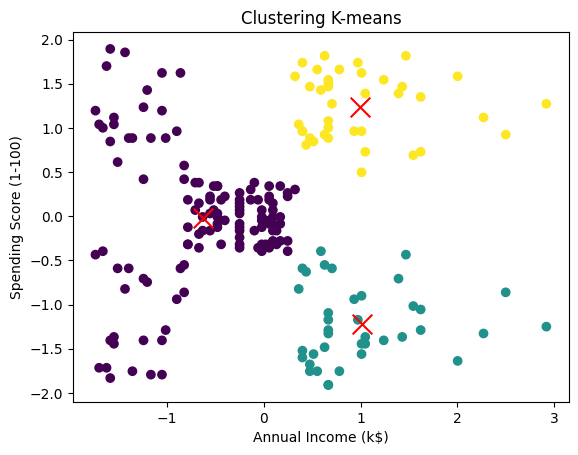

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Paso1: selecciono las features Seleccionar las columnas relevantes para el clustering
subset_df = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Paso 2: Escalar los datos
scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(subset_df)

# Paso 3: configurar número de clusteres
n_clusters = 3

#Paso 4: Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state= 42, n_init=10)
labels = kmeans.fit_predict(subset_df_scaled)

# Paso 5 Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_

#Paso 6: Generar figura de datos
plt.scatter(subset_df_scaled[:, 0], subset_df_scaled[:, 1], c=labels, cmap='viridis', marker="o", picker=True)

#Paso 7: Graficar centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

#Contextualización del gráfico
plt.title('Clustering K-means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### **DBSCAN**:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Sintaxis:

```
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X)
```

*   **eps:** Radio máximo que define el vecindario de un punto. Los puntos dentro de este radio se consideran vecinos.
*   **min_samples:** Número mínimo de puntos requeridos para formar un grupo (cluster).
*   **metric:** Métrica utilizada para medir la distancia entre puntos. Por defecto, se utiliza la distancia euclidiana ('euclidean'), pero se puede usar otra métrica según las necesidades.


#. clusters estimado: 5
# puntos ruidosos: 21


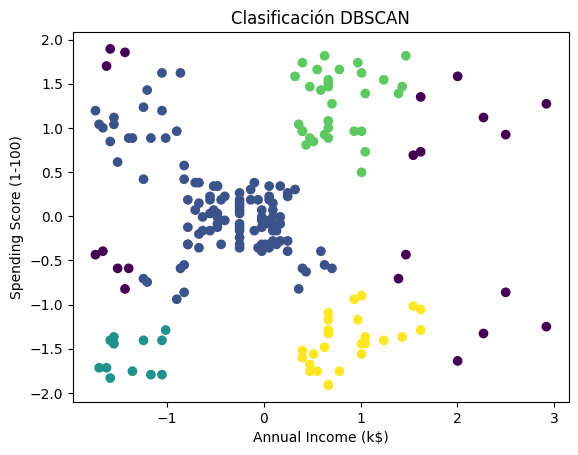

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Paso 1: Seleccionar las columnas/ feautes relevantes para el clustering
subset_df = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Paso 2: Escalar los datos
scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(subset_df)

# Paso 3: especificar parámetros DBSCAN
epsilon = 0.5
min_samples = 10

# Paso 4: Aplicar el algoritmo
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(subset_df_scaled)
labels = db.labels_
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)

print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
#colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))

#Generar el gráfico de dispersión
plt.scatter(subset_df_scaled[:, 0], subset_df_scaled[:, 1], c=labels, cmap='viridis', marker="o", picker=True)

#Contextualziación del gráfico
plt.title('Clasificación DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()